In [12]:
import pickle
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats

colors = ['navy', 'orange']
labels = ['20° zenith', 'random zenith']
hatches = ['//', '\\']
histsize = (8,8)
fs = 16
nbins = 20
legends = [mpatches.Patch(facecolor='none', edgecolor=colors[0], hatch=hatches[0]), 
           mpatches.Patch(facecolor='none', edgecolor=colors[1], hatch=hatches[1])]

# Sum Residuals

In [13]:
table = f'data/cleaner_zALL_sum_residuals.pickle'
table20 = f'data/cleaner_z20_sum_residuals.pickle'
with open(table20,'rb') as f: ds20 = pickle.load(f)
with open(table,'rb') as f: dsALL = pickle.load(f)

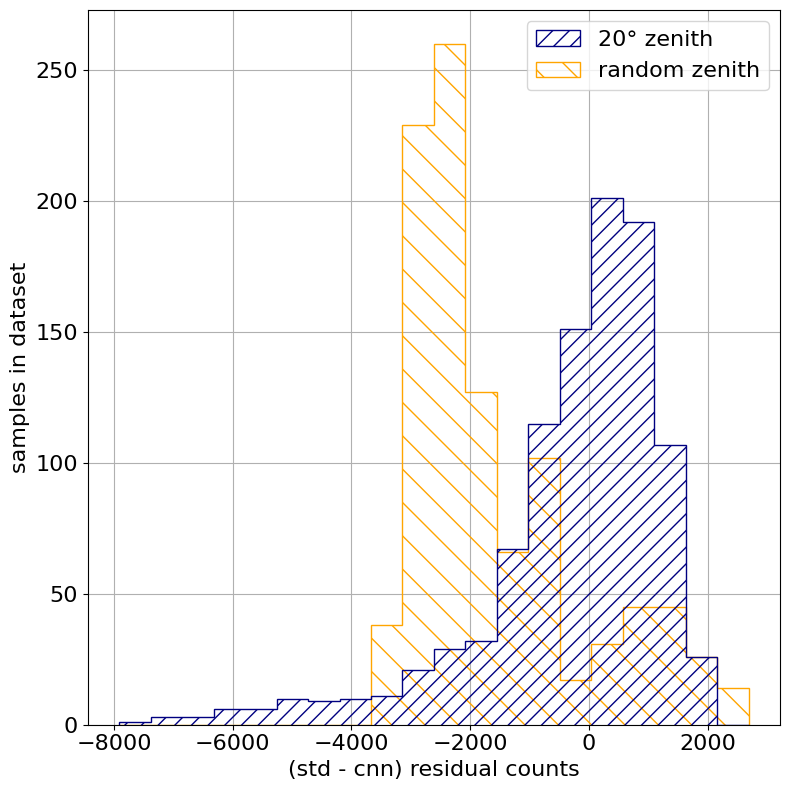

In [14]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (np.abs(ds20['STD']) - np.abs(ds20['CNN']), np.abs(dsALL['STD']) - np.abs(dsALL['CNN']))
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors, label=labels)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('(std - cnn) residual counts', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.tight_layout()
fig.savefig(f'tesi/compare_ds_residuals_diff.png')
plt.show()

# Sum FOV

In [17]:
table = f'data/cleaner_zALL_sum_fov.pickle'
table20 = f'data/cleaner_z20_sum_fov.pickle'
with open(table,'rb') as f: dsALL = pickle.load(f)
with open(table20,'rb') as f: ds20 = pickle.load(f)
    
ds20.keys()

dict_keys(['NOISY', 'STD', 'CNN', 'DIFF'])

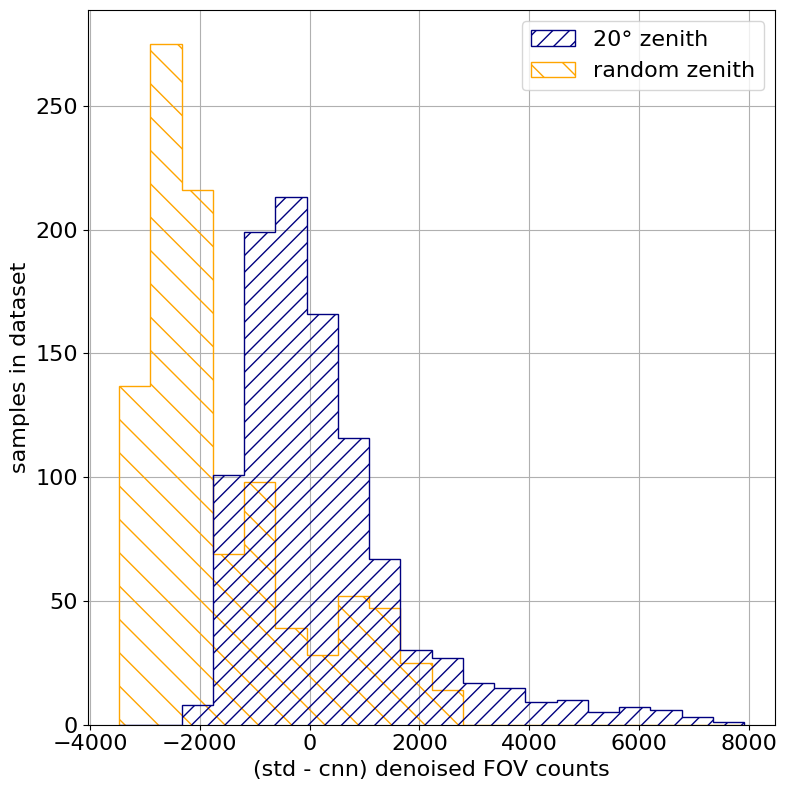

In [18]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (ds20['DIFF'], dsALL['DIFF'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors, label=labels)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('(std - cnn) denoised FOV counts', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.tight_layout()
fig.savefig(f'tesi/compare_ds_fov_denoised.png')
plt.show()

# Sum ON 

In [21]:
table = f'data/cleaner_zALL_sum_on_region.pickle'
table20 = f'data/cleaner_z20_sum_on_region.pickle'
with open(table20,'rb') as f: ds20 = pickle.load(f)
with open(table,'rb') as f: dsALL = pickle.load(f)
    
ds20.keys()

dict_keys(['STD', 'CNN', 'AP_EXCESS', 'DIFF'])

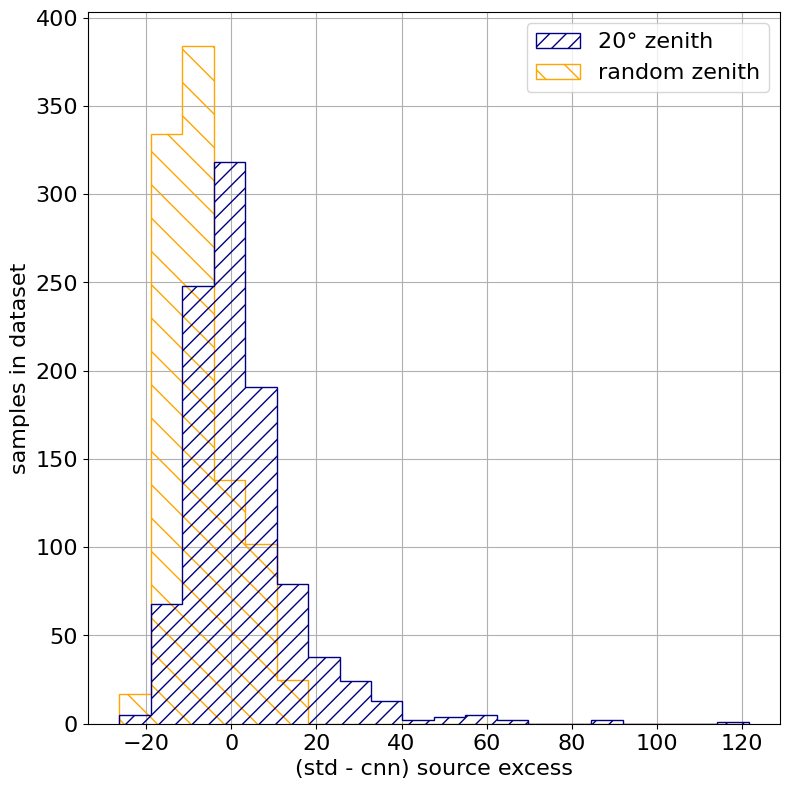

In [22]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (ds20['DIFF'], dsALL['DIFF'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors, label=labels)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('(std - cnn) source excess', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.tight_layout()
fig.savefig(f'tesi/compare_ds_on_excess.png')
plt.show()